In [61]:
import yt
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [62]:
# levels and 1D arrays (cell centres) with ghost cells
num_levels = 3
num_ghosts = 3
array_size = 30
x = [None for l in range(num_levels)]
dx = [2.0**(i+1) for i in reversed(range(num_levels))]
for i,gdx in enumerate(dx):
    x[i] = (np.arange(-num_ghosts*gdx,
                     (array_size+num_ghosts)*gdx,
                     gdx)
            +gdx/2.0)

In [63]:
# 3D arrays of coordinates and fluid density
sigma = np.median(x[0])
A = 100.
X = [None for l in range(num_levels)]
Y = [None for l in range(num_levels)]
Z = [None for l in range(num_levels)]
rho = [None for l in range(num_levels)]
for i,xg in enumerate(x):
    X[i],Y[i],Z[i] = np.meshgrid(xg,xg,xg)
    rE

/home/jmiller/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: an index can only have a single Ellipsis (`...`); replace all but one with slices (`:`).
  app.launch_new_instance()


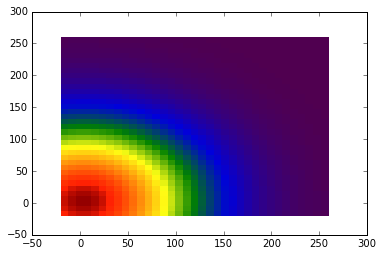

In [64]:
# Show what the Gaussian looks like as 
# a simple heatmap in matplotlib (coarsest grid).
plt.pcolor(X[0][...,...,0],Y[0][...,...,0],rho[0][...,...,0])

In [96]:
# Initiate grids for load AMR grids
# here we disregard ghosts.
grid_data = [None for l in range(num_levels)]
for i,xg in enumerate(x):
    grid_data[i] = dict(left_edge = [xg[num_ghosts]-dx[i]/2.,
                                     xg[num_ghosts]-dx[i]/2.,
                                     xg[num_ghosts]-dx[i]/2.],
                       right_edge = [xg[-num_ghosts]-dx[i]/2.,
                                     xg[-num_ghosts]-dx[i]/2.,
                                     xg[-num_ghosts]-dx[i]/2.],
                       level = i,
                       dimensions = [array_size,
                                     array_size,
                                     array_size])
for i,g in enumerate(grid_data):
    g["density"] = rho[i][num_ghosts:-num_ghosts,
                         num_ghosts:-num_ghosts,
                         num_ghosts:-num_ghosts]
    g["GRID::x"] = X[i][num_ghosts:-num_ghosts,
                         num_ghosts:-num_ghosts,
                         num_ghosts:-num_ghosts]
    g["GRID::y"] = Y[i][num_ghosts:-num_ghosts,
                         num_ghosts:-num_ghosts,
                         num_ghosts:-num_ghosts]
    g["GRID::z"] = Z[i][num_ghosts:-num_ghosts,
                         num_ghosts:-num_ghosts,
                         num_ghosts:-num_ghosts]
field_units = {"density":"g/cm**3",
               "GRID::x":"code_length",
               "GRID::x":"code_length",
               "GRID::x":"code_length"}
limits = [grid_data[0]['left_edge'][0],
         grid_data[0]['right_edge'][0]]
bbox = np.array([limits,limits,limits])
dimensions=[array_size,array_size,array_size]

In [97]:
for g in ds.index.grids:
    print g.LeftEdge,g.RightEdge

[ 0.  0.  0.] code_length [ 240.  240.  240.] code_length
[ 0.  0.  0.] code_length [ 120.  120.  120.] code_length
[ 0.  0.  0.] code_length [ 60.  60.  60.] code_length


In [98]:
ds = yt.load_amr_grids(grid_data,
                      dimensions,
                      field_units=field_units,
                     bbox=bbox,
                     periodicity=(False,False,False))

yt : [INFO     ] 2016-04-17 17:53:37,586 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-04-17 17:53:37,587 Parameters: domain_dimensions         = [30 30 30]
yt : [INFO     ] 2016-04-17 17:53:37,588 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2016-04-17 17:53:37,588 Parameters: domain_right_edge         = [ 240.  240.  240.]
yt : [INFO     ] 2016-04-17 17:53:37,589 Parameters: cosmological_simulation   = 0.0


yt : [INFO     ] 2016-04-17 17:56:02,942 xlim = 0.000000 240.000000
yt : [INFO     ] 2016-04-17 17:56:02,943 ylim = 0.000000 240.000000
yt : [INFO     ] 2016-04-17 17:56:02,945 xlim = 0.000000 240.000000
yt : [INFO     ] 2016-04-17 17:56:02,946 ylim = 0.000000 240.000000
yt : [INFO     ] 2016-04-17 17:56:02,947 Making a fixed resolution buffer of (('index', 'grid_level')) 800 by 800



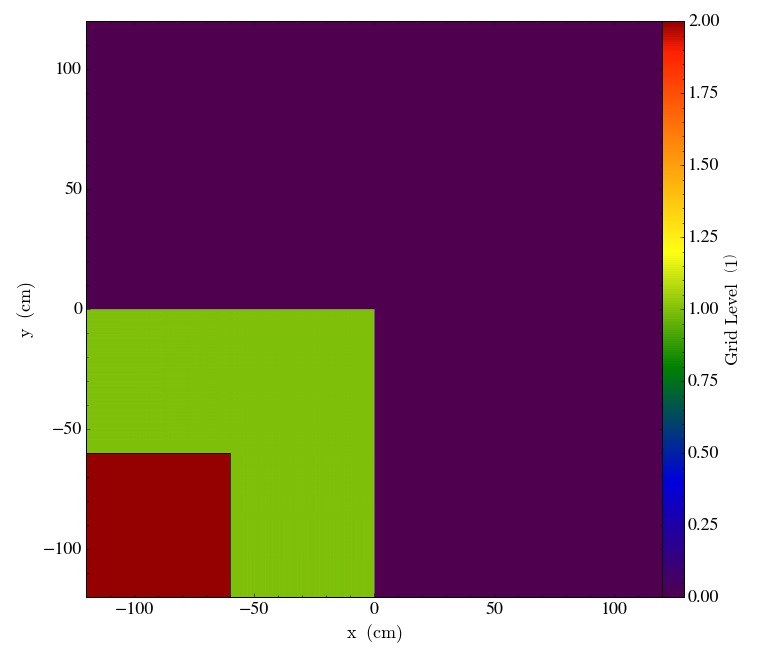

In [107]:
slc = yt.SlicePlot(ds,'z','grid_level',center=[120,120,0],width=240)
slc.annotate_grids()
slc.set_log('grid_level',False)
slc.show()

yt : [INFO     ] 2016-04-17 17:56:28,739 Projection completed
yt : [INFO     ] 2016-04-17 17:56:28,740 xlim = 0.000000 240.000000
yt : [INFO     ] 2016-04-17 17:56:28,740 ylim = 0.000000 240.000000
yt : [INFO     ] 2016-04-17 17:56:28,743 xlim = 0.000000 240.000000
yt : [INFO     ] 2016-04-17 17:56:28,743 ylim = 0.000000 240.000000
yt : [INFO     ] 2016-04-17 17:56:28,744 Making a fixed resolution buffer of (('index', 'grid_level')) 800 by 800



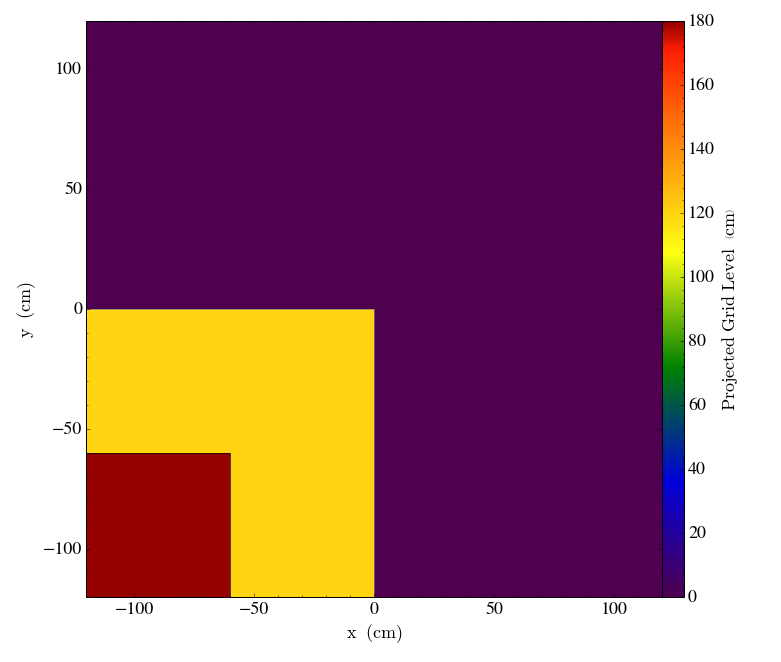

In [108]:
prj = yt.ProjectionPlot(ds,'z','grid_level',center=[120,120,0],width=240)
prj.annotate_grids()
prj.set_log('grid_level',False)
prj.show()

yt : [INFO     ] 2016-04-17 17:59:14,662 Projection completed
yt : [INFO     ] 2016-04-17 17:59:14,663 xlim = 0.000000 240.000000
yt : [INFO     ] 2016-04-17 17:59:14,663 ylim = 0.000000 240.000000
yt : [INFO     ] 2016-04-17 17:59:14,665 xlim = 0.000000 240.000000
yt : [INFO     ] 2016-04-17 17:59:14,666 ylim = 0.000000 240.000000
yt : [INFO     ] 2016-04-17 17:59:14,667 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



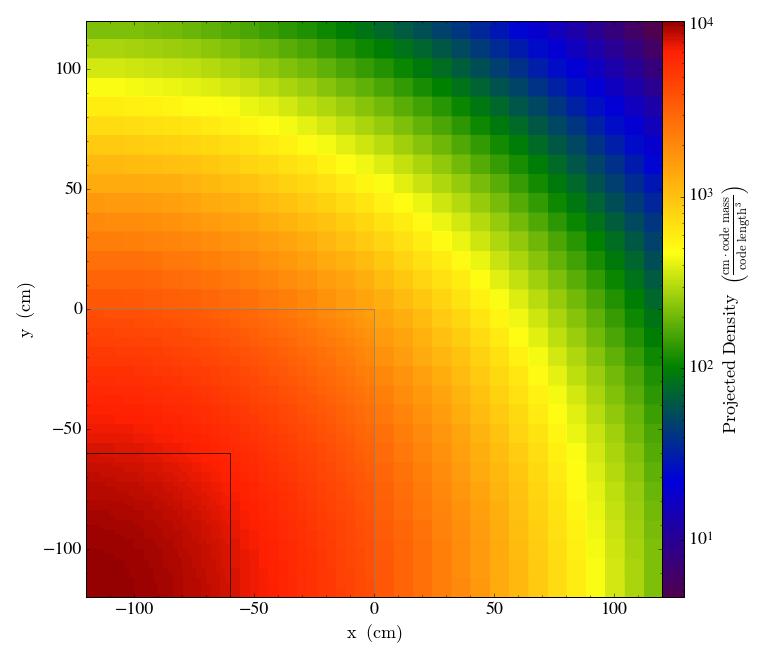

In [111]:
prj = yt.ProjectionPlot(ds,'z','density',center=[120,120,0],width=240)
prj.annotate_grids()
prj.set_log('density',True)
prj.show()